Seasonal Arima - Time Series Model 

The dataset contains temperature readings for Dublin city in Ireland over the years .  The task in hand is to predict temperature in future based on historical data .

The approach taken here is to used seasonal Arima modelling 


#Import packages and read data

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [82]:
tmp= pd.read_csv("/content/s_arima_dublin_temp.csv")
tmp.head()

,date,maxtp
0,11/1/1941,14.0
1,12/1/1941,12.7
2,1/1/1942,11.9
3,2/1/1942,11.6
4,3/1/1942,16.2


# EDA 

In [83]:
tmp.shape

(927, 2)

In [84]:
import datetime as dt
tmp["date"]=pd.to_datetime(tmp["date"])
tmp["month"]= tmp["date"].dt.month
tmp["year"]=tmp["date"].dt.year


In [85]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    927 non-null    datetime64[ns]
 1   maxtp   927 non-null    float64       
 2   month   927 non-null    int64         
 3   year    927 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 29.1 KB


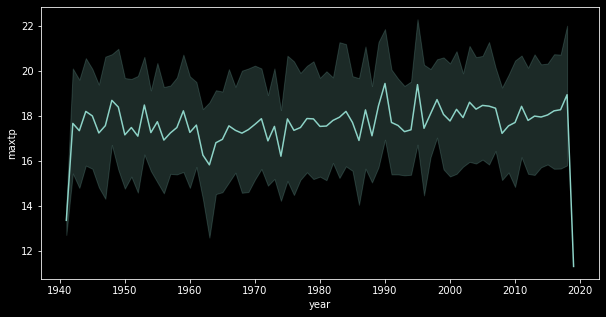

In [86]:
plt.style.use("dark_background")
plt.figure(figsize=(10,5))
sns.lineplot(x=tmp["year"], y=tmp["maxtp"])

Data is not stationary 

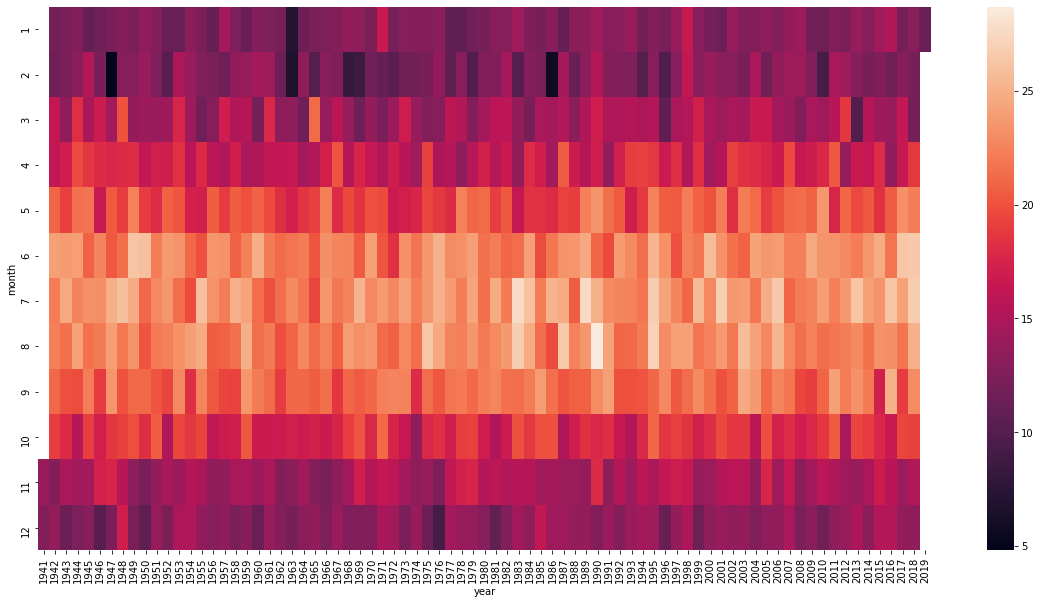

In [60]:
# correlation between temperature , month and year
weather= tmp.pivot("month","year","maxtp")
plt.figure(figsize=(20,10))
sns.heatmap(weather)

#Data normalization 

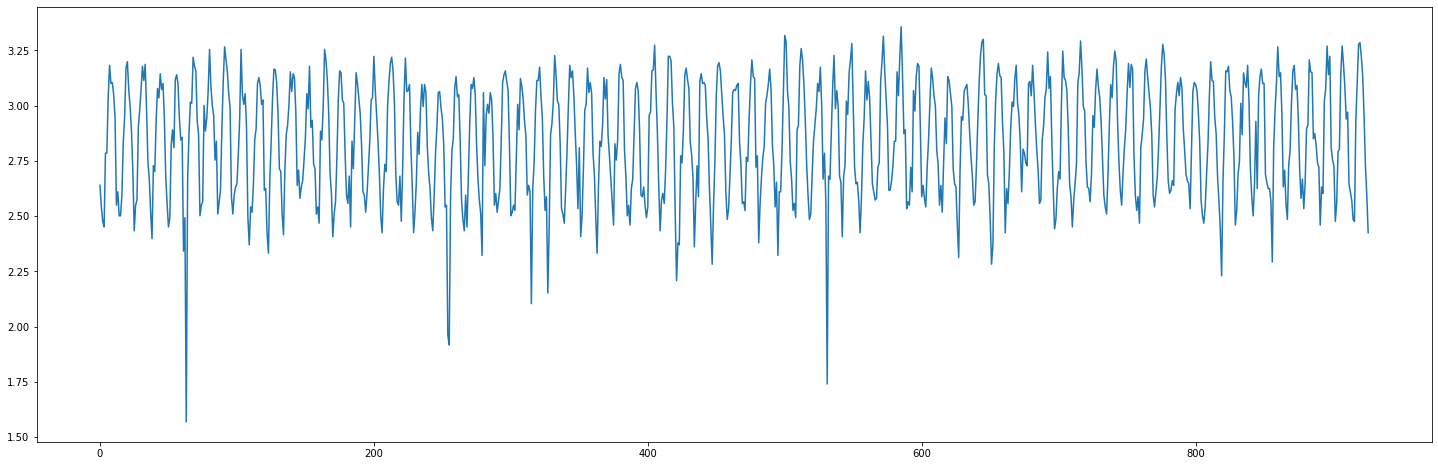

In [61]:
from pandas import Series

series=pd.Series(data=tmp["maxtp"])
series
series=np.log(series)
plt.figure(figsize=(25,8))
series.plot(x="date", y="maxtp")

#Time series decomposition 

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(series.values, model="multiplicative", freq=3)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual =decomposition.resid


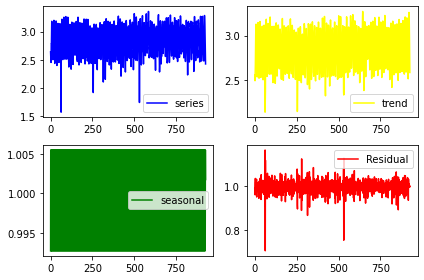

In [63]:
plt.subplot(221)
plt.plot(series,color="blue",label="series")
plt.legend(loc="best")
plt.subplot(222)
plt.plot(trend,color="yellow", label="trend")
plt.legend(loc="best")
plt.tight_layout()
plt.subplot(223)
plt.plot(seasonal, color="green", label="seasonal")
plt.legend(loc="best")
plt.tight_layout()
plt.subplot(224)
plt.plot(residual, color="red", label="Residual")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#ARIMA Modelling 

In [64]:
!pip install pyramid-arima


In [65]:
from pyramid.arima import auto_arima
from pyramid.arima.stationarity import ADFTest

## ADF test 

In [66]:
adftest=ADFTest(alpha=0.05)
adftest.is_stationary(series)

(0.99, False)

## Train - Test data 

(741,)
(186,)


Text(0, 0.5, 'log[max temperature]')

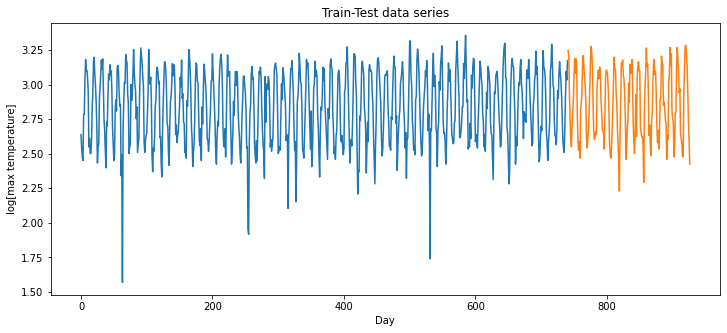

In [67]:
train= series[:741]
test=series[741:]
print (train.shape)
print (test.shape)
plt.figure(figsize=(12,5))
plt.plot(train)
plt.plot(test)
plt.title("Train-Test data series")
plt.xlabel("Day")
plt.ylabel("log[max temperature]")

## Training 

In [68]:
ar_mod=auto_arima(train, start_p=1,start_q=1,max_p=3,max_q=3,start_P=1,start_Q=0,max_P=3,max_Q=3, d=1,D=1,m=12, seasonal=True, random_state=4,trace=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=-822.144, BIC=-799.193, Fit time=9.066 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-271.455, BIC=-262.275, Fit time=0.240 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-627.284, BIC=-608.923, Fit time=3.146 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-1092.692, BIC=-1074.331, Fit time=12.115 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-1091.227, BIC=-1068.276, Fit time=13.356 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-655.522, BIC=-641.751, Fit time=1.992 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=-1091.405, BIC=-1068.453, Fit time=34.175 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-1089.379, BIC=-1061.837, Fit time=26.641 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-1107.795, BIC=-1084.844, Fit time=12.113 seconds
Fit ARIMA: or

In [69]:
ar_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  741
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 558.898
Date:                            Mon, 10 Aug 2020   AIC                          -1107.795
Time:                                    12:08:13   BIC                          -1084.844
Sample:                                         0   HQIC                         -1098.939
                                            - 741                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.331e-06   6.37e-06      0.366      0.714   -1.02e-05    1.48e-05
ar.L1          0.1623      0.034      4.808      0.000       0.096       0.229
ma.L1         -0.9840      0.013    -75.137      0.000      -1.010      -0.958
ma.S.L12      -0.9929      0.086    -11.593      0.000      -1.161      -0.825
sigma2         0.0117      0.001     12.054      0.000       0.010       0.014
===================================================================================
Ljung-Box (Q):                       55.25   Jarque-Bera (JB):              3253.98
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -1.48
Prob(H) (two-sided):                  0.04   Kurtosis:                        12.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##Predictions for next 186 days

In [70]:
prediction=pd.DataFrame(ar_mod.predict(n_periods= 186), index=test.index)
prediction.columns=["Predicted Temperature"]
prediction

,Predicted Temperature
741,3.158112
742,3.082609
743,2.918119
744,2.724404
745,2.605860
...,...
922,3.109566
923,2.944910
924,2.751203
925,2.632695


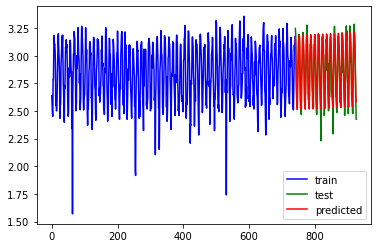

In [71]:
plt.plot(train,color="blue", label="train")
plt.plot(test,color="green", label="test")
plt.plot(prediction,color="red", label="predicted")
plt.legend(loc="best")

##Model Evaluation 

In [72]:
inv_pred= prediction["Predicted Temperature"]
#print ("before", inv_pred)
inv_pred=np.exp(inv_pred)
#print ("after", inv_pred)
#print ("before test", test)
test= np.exp(test)
#print ("after test", test)
# print (test)
mse= (inv_pred-test)/test
# print (mse)
print (np.mean(mse))
mse=abs(mse)
below10= mse[mse<0.10].count()
all= mse.count()
accuracy=below10/all
print ("Accuracy", accuracy)

0.022560104878887516
Accuracy 0.7365591397849462


MSE mean =  0.0225601

Accuracy = 0.7365

#SARIMAX Model 

In [73]:
import statsmodels.api as sm 
model1= sm.tsa.statespace.SARIMAX(train, seasonal_order=(2,1,0,12), trend='c', enforce_invertibility=False)
res=model1.fit()

In [74]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              maxtp   No. Observations:                  741
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 469.365
Date:                            Mon, 10 Aug 2020   AIC                           -928.730
Time:                                    12:08:24   BIC                           -905.772
Sample:                                         0   HQIC                          -919.872
                                            - 741                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.005      0.133      0.894      -0.009       0.011
ar.L1          0.1728      0.032      5.475      0.000       0.111       0.235
ar.S.L12      -0.6075      0.023    -26.894      0.000      -0.652      -0.563
ar.S.L24      -0.3257      0.023    -14.129      0.000      -0.371      -0.280
sigma2         0.0160      0.000     39.750      0.000       0.015       0.017
===================================================================================
Ljung-Box (Q):                      129.67   Jarque-Bera (JB):              2088.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.97
Prob(H) (two-sided):                  0.12   Kurtosis:                        11.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Model Evaluation 

In [79]:

pred1= res.predict(741,925, typ='levels')
pred1=np.exp(pred1)
mse1=(pred1-test)/test
print("MSE Mean", np.mean(mse1))
below10_x= mse1[mse1<0.10].count()
all_x= mse1.count()
accuracy=below10_x/all_x
print ("Accuracy", accuracy)

MSE Mean 0.00641262494196439
Accuracy 0.8540540540540541


improved scores:

MSE mean = 0.00641

Accuracy = 0.85

The end 